<a href="https://colab.research.google.com/github/atyanshv/python/blob/main/ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Aim :-** Build an Artificial Neural Network (ANN) by implementing the Backpropagation algorithm and test the same using MNIST Handwritten Digit Multiclass classification  data sets with use of use of batch normalization, early stopping and drop out.

Loading the MNIST dataset in Keras

In [ ]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [ ]:
train_images.shape
len(train_labels)
train_labels
test_images.shape
len(test_labels)
test_labels


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

The network architecture


In [ ]:
from keras import models
from keras import layers
network = models.Sequential()
# Dense(32) is a fully-connected layer with 32 hidden units.
# in the first layer, you must specify the expected input data shape :
# here, 28 X 28=784 -dimensional vectors.
network.add(layers.Dense(32, activation='sigmoid', input_shape=(28 * 28, )))
network.add(layers.Dense(8, activation='sigmoid'))
network.add(layers.Dense(10, activation='softmax'))
network.summary()
from google.colab import drive
drive.mount('/content/drive')


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 8)                 264       
                                                                 
 dense_5 (Dense)             (None, 10)                90        
                                                                 
Total params: 25,474
Trainable params: 25,474
Non-trainable params: 0
_________________________________________________________________
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


The compilation step


In [ ]:
network.compile(optimizer='sgd',
                loss='categorical_crossentropy',
                metrics=['accuracy'])


Preparing the image data


In [ ]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255.
test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255.


Preparing the labels


In [ ]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels)
train_labels
test_labels = to_categorical(test_labels)
test_labels


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Training and Testing


In [ ]:
network.fit(train_images, train_labels, epochs=160, batch_size=512)


Epoch 1/160
118/118 [==============================] - 1s 4ms/step - loss: 2.3542 - accuracy: 0.0986
Epoch 2/160
118/118 [==============================] - 1s 4ms/step - loss: 2.3184 - accuracy: 0.1000
Epoch 3/160
118/118 [==============================] - 0s 4ms/step - loss: 2.3005 - accuracy: 0.1254
Epoch 4/160
118/118 [==============================] - 1s 4ms/step - loss: 2.2890 - accuracy: 0.2033
Epoch 5/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2802 - accuracy: 0.2148
Epoch 6/160
118/118 [==============================] - 1s 4ms/step - loss: 2.2727 - accuracy: 0.2384
Epoch 7/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2655 - accuracy: 0.2413
Epoch 8/160
118/118 [==============================] - 1s 4ms/step - loss: 2.2584 - accuracy: 0.2433
Epoch 9/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2511 - accuracy: 0.2530
Epoch 10/160
118/118 [==============================] - 0s 4ms/step - loss: 2.2434 - accura

In [ ]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('Test Accuracy: {:.5f} '.format(test_acc))
test_acc


313/313 [==============================] - 1s 3ms/step - loss: 0.6393 - accuracy: 0.8462
Test Accuracy: 0.84620 


0.8461999893188477

Epoch 1/5
79/79 [==============================] - 1s 8ms/step - loss: 0.6531 - accuracy: 0.8376 - val_loss: 0.6359 - val_accuracy: 0.8464
Epoch 2/5
79/79 [==============================] - 0s 6ms/step - loss: 0.6507 - accuracy: 0.8383 - val_loss: 0.6337 - val_accuracy: 0.8471
Epoch 3/5
79/79 [==============================] - 0s 6ms/step - loss: 0.6483 - accuracy: 0.8388 - val_loss: 0.6315 - val_accuracy: 0.8476
Epoch 4/5
79/79 [==============================] - 0s 6ms/step - loss: 0.6459 - accuracy: 0.8393 - val_loss: 0.6292 - val_accuracy: 0.8484
Epoch 5/5
79/79 [==============================] - 0s 5ms/step - loss: 0.6436 - accuracy: 0.8399 - val_loss: 0.6270 - val_accuracy: 0.8489
dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


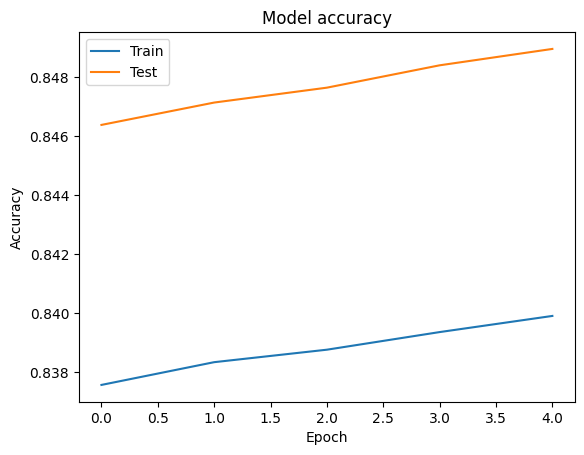

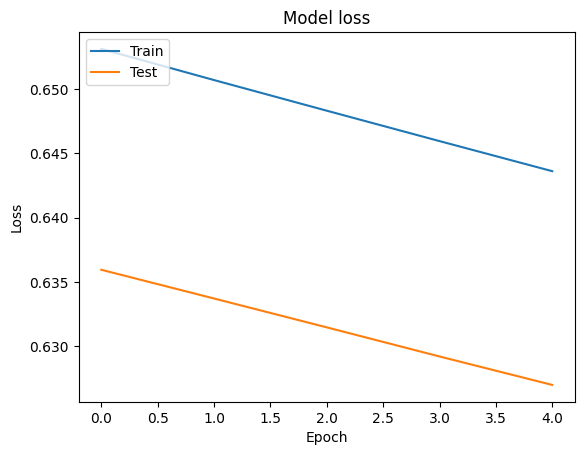

In [ ]:
from keras.utils import plot_model
plot_model(network, to_file='model.png')
import matplotlib.pyplot as plt
history =network.fit(train_images, train_labels, validation_split=0.33,epochs=5, batch_size=512)
history_dict = history.history
print(history_dict.keys())
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
